In [15]:
queryDic = {}
file = open('/qbio/prom317/tutorial/transCutAlignment/CLIP_35L33G/Aligned.out.sam', 'r')
lines = file.readlines()
for line in lines:
    if line.startswith("SRR"):
        if "ENSMUST00000083506.3" in line:
            lineSep = line.split('\t')
            queryName = lineSep[0]
            pos = int(lineSep[3])
            cigar = lineSep[5]
            seq = lineSep[9]
            queryDic[queryName] = [pos, cigar, seq]

In [18]:
import re
p = re.compile("[0-9]+M")
for i in queryDic.keys():
    cigar = queryDic[i][1]
    m=p.search(cigar)
    if m:
        newCigar = m.group()
        cigarList = cigar.split(newCigar)
        cigarList.insert(1, newCigar)
        newCigarList = []
        for j in range(len(cigarList)):
            if cigarList[j]:
                newCigarList.append(cigarList[j])
        queryDic[i].append(newCigarList)

In [41]:
baseMatchDic = {}
for i in range(1, 89):
    baseMatchDic[i] = [0,0,0,0]

refseq = "CCAGGCTGAGGTAGTAGTTTGTACAGTTTGAGGGTCTATGATACCACCCGGTACAGGAGATAACTGTACAGGCCACTGCCTTGCCAGG"
for i in queryDic.keys():
    cigarList = queryDic[i][3]
    querySeq = queryDic[i][2]
    refCount = queryDic[i][0]-1
    queryCount = 0
    if cigarList[0].endswith("S"):
        queryCount += int(cigarList[0][:-1])
        length = int(cigarList[1][:-1])
    else:
        length = int(cigarList[0][:-1])
    for j in range(length):
        if querySeq[queryCount+j] == "A":
            baseMatchDic[refCount+j+1][0] +=1
        elif querySeq[queryCount+j] == "T":
            baseMatchDic[refCount+j+1][1] +=1
        elif querySeq[queryCount+j] == "G":
            baseMatchDic[refCount+j+1][2] +=1
        elif querySeq[queryCount+j] == "C":
            baseMatchDic[refCount+j+1][3] +=1

In [47]:
import numpy as np


def entropy(x):
    count = 0
    for i in range(len(x)):
        count += x[i]
    for i in range(len(x)):
        x[i] = x[i]/count
    shEnt = 0
    for i in range(len(x)):
        if x[i] != 0:
            shEnt += -1 * x[i] * float(np.log2(x[i]))
    return shEnt

0.9182958340544896


In [49]:
shEntList = []
for i in range(1,89):
    data = baseMatchDic[i]
    shEntList.append(entropy(data))
    
print(shEntList)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.16866093149667025, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.15935006268563445, 0.0, 0.0, 0.0, 1.3320649618769065, 0.31435586359270684, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06385368546122085, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


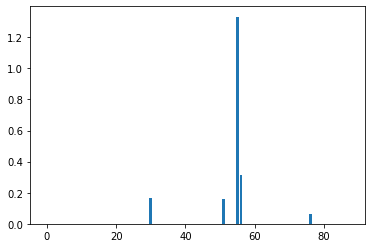

In [51]:
import matplotlib.pyplot as plt

x = np.arange(88)
plt.bar(x, shEntList)
plt.show()